# Theory:

<hr>

<p> 
    <font color="tomato">
        Volume Weighted Average Price [VWAP]:
    </font>
    <br>
    
    It a technique used by stock traders to reduce the noise and find out the actual trends, 
    considering factors such as Volume and Rate.
</p>


<p> 
    <font color="tomato">
        Auto Regressive Integrated Moving Average [ARIMA]:
    </font>
    <br>
    
    ARIMA is a very popular statistical method for time series forecasting. 
    ARIMA models take into account the past values to predict the future values.
    
    There are three important parameters in ARIMA:
        - p (past values used for forecasting the next value)
        - q (past forecast errors used to predict the future values)
        - d (order of differencing)
</p>

## Dataset:
<hr>

<p>
    Dataset collected from National Stock Exchange [NSE].<br>
    Link: https://www.nseindia.com/products/content/equities/equities/eq_security.htm
    
    Companies:
        - Biocon
        - Britannia
        - Coal India
        - Eicher Motors
        - Heidelberg
        - ICICI Bank
        - ITC
        - Maruti
        - Priya Village Roadshow (PVR)
        - SBI
</p>


# Code:
<hr>

### Global Variables:

In [31]:
rmseStock = {}

### Imports and Global Settings:

In [32]:
# import packages### Helper Functions:
import numpy as np
import pandas as pd

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# to plot charts and figures
import matplotlib.pyplot as plt
%matplotlib inline


In [33]:
# Matplotlib setting to adjust the plot size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10


In [34]:
# Importing the ARIMA Library
from pmdarima.arima import auto_arima

In [35]:
# Data Normalisation
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))


### Helper Functions:

In [36]:
# Read the Dataset
def readCSV(filename):
    filename = "Dataset\\" + filename + ".csv"
    df = pd.read_csv(filename)
    df = cleanDate(df)
    return df    


# Changing the date to a standard format [dd-mm-yy]
def cleanDate(df):
    df['Date'] = pd.to_datetime(df.Date,format='%d-%b-%Y')
    df.index = df['Date']
    return df
    

#     Helper function to plot VWAP for stocks
def plotChart(df):
    plt.figure(figsize=(24, 8))
    plt.plot(df['Average Price'], label='VWAP')
    plt.xlabel("Date")
    plt.ylabel("Volume Weighted Average Price")
    plt.legend()
    
    
# Print the entire dataset
def printEntireData(df):
    print(df)
    plotChart(df)
    

# Print a sample of the dataset
def printSampleData(df):
    length = len(df)
    list = [0, 5, 6, 9, 10]
    df1 = df[0:5]
    print(df1[df1.columns[list]])
    print(".\n.\n.")
    df2 = df[987:]
    print(df2[df2.columns[list]])
    print("\nDisplaying 10 out of {} rows.".format(length))


## Implementation of ARIMA model:

<hr>

In [37]:
def arimaModel(df, stock):
    data = df.sort_index(ascending=True, axis=0)

    # Total data: 992
    endTrainingValue = 962
    train = data[:endTrainingValue]
    valid = data[endTrainingValue:]

    predictionPeriod = len(data) - len(train)

    training = train['Average Price']
    validation = valid['Average Price']

    model = auto_arima(training, start_p=1, start_q=1, max_p=3, max_q=3, m=12, start_P=0, seasonal=True, d=1, D=1, trace=True, error_action='ignore', suppress_warnings=True)
    model.fit(training)

    forecast = model.predict(n_periods = predictionPeriod)
    forecast = pd.DataFrame(forecast, index = valid.index, columns=['Prediction'])

    arimaModelError(valid, forecast, stock)
    plotResult(train, valid, forecast, stock)


In [38]:
# Generating Root Mean Square Error (RMSE):
def arimaModelError(valid, forecast, stock):
    rms = np.sqrt(np.mean(np.power((np.array(valid['Average Price']) - np.array(forecast['Prediction'])),2)))
    print("Root Mean Square Error: {}".format(rms))
    rmseStock[stock] = rms

In [39]:
# Helper Function to Plot the result of the ARIMA model
def plotResult(train, valid, forecast, stock):
    plt.figure(figsize=(24, 6))
    plt.plot(train['Average Price'], label = "Training Data VWAP")
    plt.plot(valid['Average Price'], label = "Validation Data VWAP")
    plt.plot(forecast['Prediction'], label = "Predicted VWAP")
    plt.title(stock, fontsize = 18)
    plt.legend()


### Reading the Dataset & Executing Models:

            Symbol  High Price  Low Price  Average Price   Volume
Date                                                             
2015-04-13  BIOCON      491.80     468.15         481.59  2337764
2015-04-15  BIOCON      495.70     474.45         486.89  1367669
2015-04-16  BIOCON      482.40     463.00         470.99   917630
2015-04-17  BIOCON      476.25     463.25         470.79   644312
2015-04-20  BIOCON      469.90     445.40         456.25  1160262
.
.
.
            Symbol  High Price  Low Price  Average Price   Volume
Date                                                             
2019-04-05  BIOCON      615.75     610.10         612.58   622322
2019-04-08  BIOCON      616.50     605.50         609.09   769326
2019-04-09  BIOCON      619.90     603.55         614.15  1624259
2019-04-10  BIOCON      636.75     613.80         627.68  2419841

Displaying 10 out of 991 rows.
Applying ARIMA Model on: BIOCON
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=8875.759, B

Root Mean Square Error: 20.917941232112238
               Symbol  High Price  Low Price  Average Price  Volume
Date                                                               
2015-04-13  EICHERMOT     16231.0   16001.00       16123.94   43662
2015-04-15  EICHERMOT     16120.0   15810.00       15940.67   44445
2015-04-16  EICHERMOT     16240.0   15734.00       16007.99  108100
2015-04-17  EICHERMOT     15875.0   15199.95       15500.59   57568
2015-04-20  EICHERMOT     15310.0   14630.00       14789.72   90233
.
.
.
               Symbol  High Price  Low Price  Average Price  Volume
Date                                                               
2019-04-10  EICHERMOT     21080.0   20650.00       20911.80   83550
2019-04-11  EICHERMOT     21073.9   20810.40       20980.04   97645
2019-04-12  EICHERMOT     21430.0   20905.05       21131.52  130351

Displaying 10 out of 990 rows.
Applying ARIMA Model on: EICHERMOT
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=14025.1

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=5997.529, BIC=6021.806, Fit time=4.901 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=6648.499, BIC=6658.210, Fit time=0.094 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=6315.943, BIC=6335.364, Fit time=1.071 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=5996.057, BIC=6015.479, Fit time=3.106 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=5997.031, BIC=6021.308, Fit time=3.800 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=6635.317, BIC=6649.883, Fit time=0.312 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 2, 12); AIC=5997.126, BIC=6021.403, Fit time=10.098 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=5997.336, BIC=6026.468, Fit time=14.949 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 1, 12); AIC=6001.829, BIC=6016.395, Fit time=2.180 seconds
Fit ARIMA: order=(0, 1, 2)

Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=5625.325, BIC=5649.602, Fit time=3.830 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 1, 1, 12); AIC=5680.840, BIC=5700.261, Fit time=3.287 seconds
Fit ARIMA: order=(0, 1, 2) seasonal_order=(1, 1, 1, 12); AIC=5626.133, BIC=5655.265, Fit time=5.285 seconds
Fit ARIMA: order=(1, 1, 2) seasonal_order=(1, 1, 1, 12); AIC=5624.966, BIC=5658.954, Fit time=7.267 seconds
Fit ARIMA: order=(1, 1, 2) seasonal_order=(0, 1, 1, 12); AIC=5633.938, BIC=5663.070, Fit time=4.270 seconds
Fit ARIMA: order=(1, 1, 2) seasonal_order=(2, 1, 1, 12); AIC=5627.240, BIC=5666.083, Fit time=20.149 seconds
Fit ARIMA: order=(1, 1, 2) seasonal_order=(1, 1, 0, 12); AIC=5900.894, BIC=5930.026, Fit time=7.730 seconds
Fit ARIMA: order=(1, 1, 2) seasonal_order=(1, 1, 2, 12); AIC=5633.868, BIC=5672.711, Fit time=20.307 seconds
Fit ARIMA: order=(1, 1, 2) seasonal_order=(0, 1, 0, 12); AIC=6101.710, BIC=6125.987, Fit time=2.698 seconds
Fit ARIMA: order=(1, 1, 2)

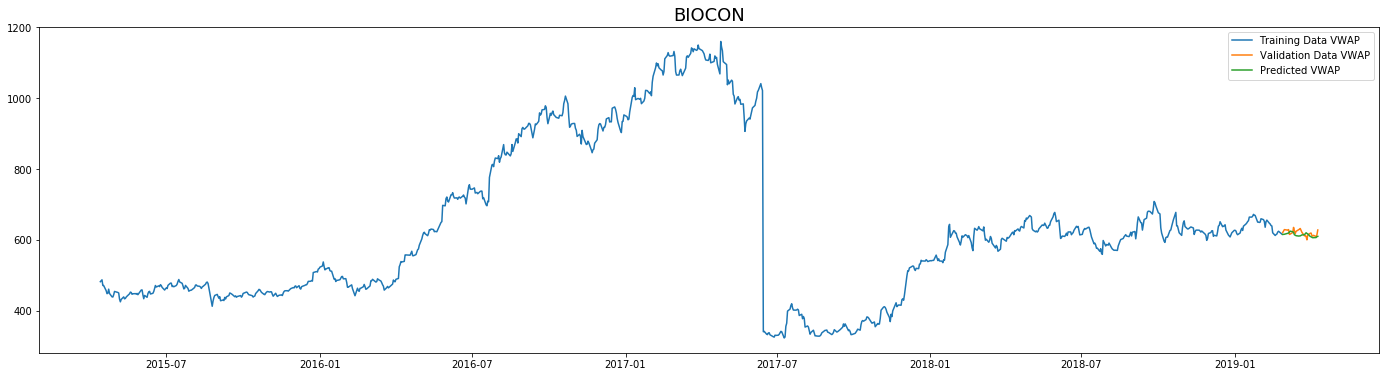

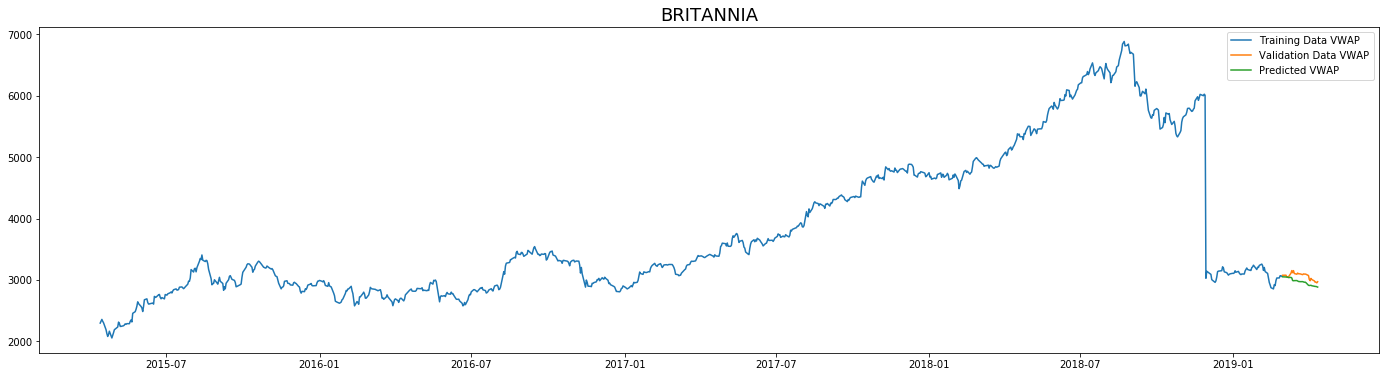

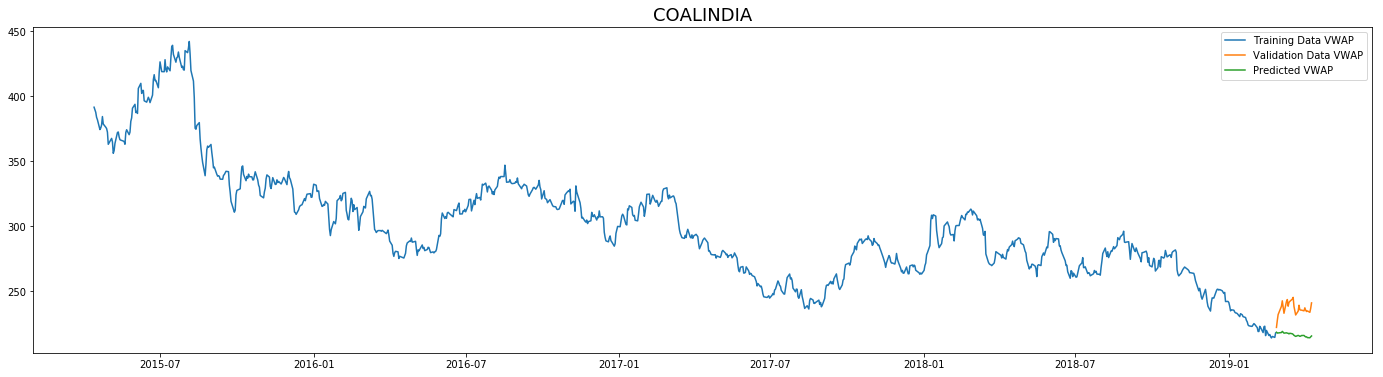

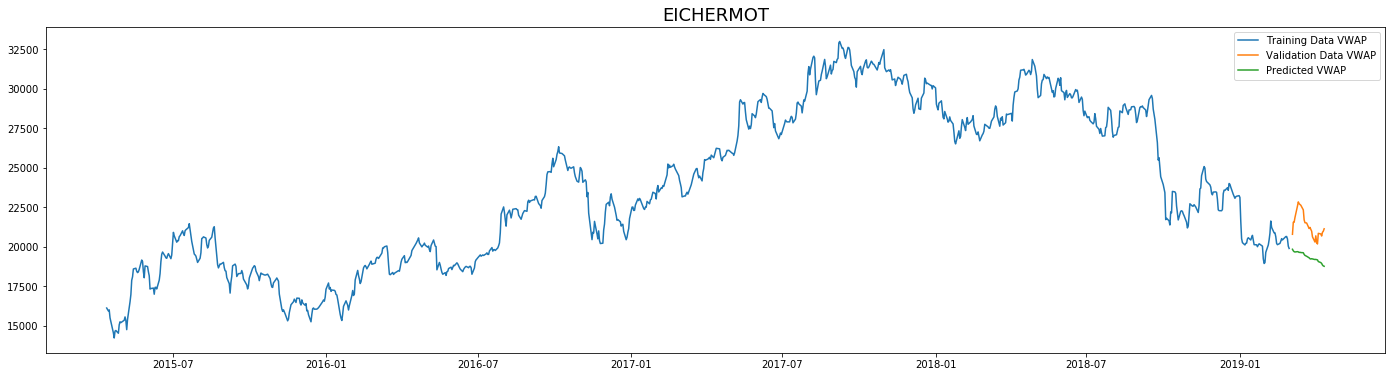

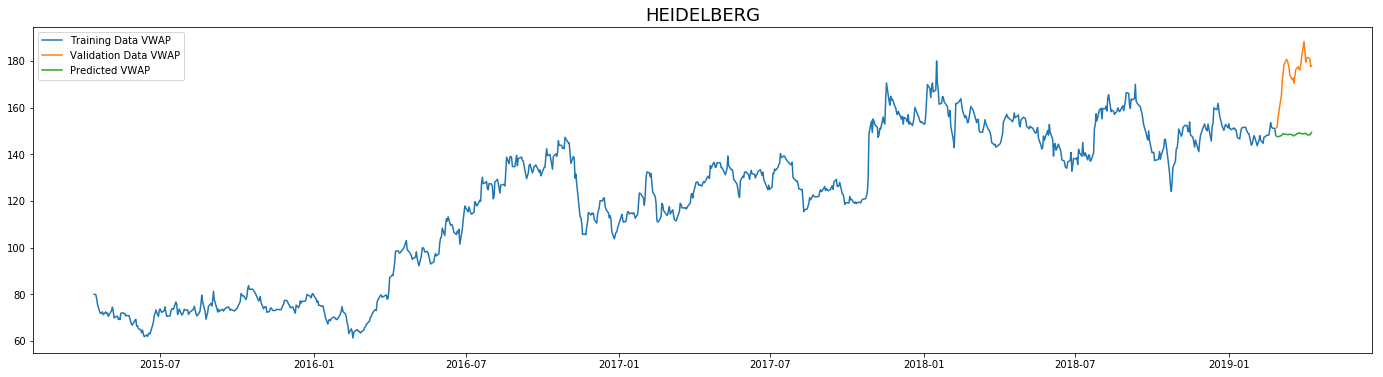

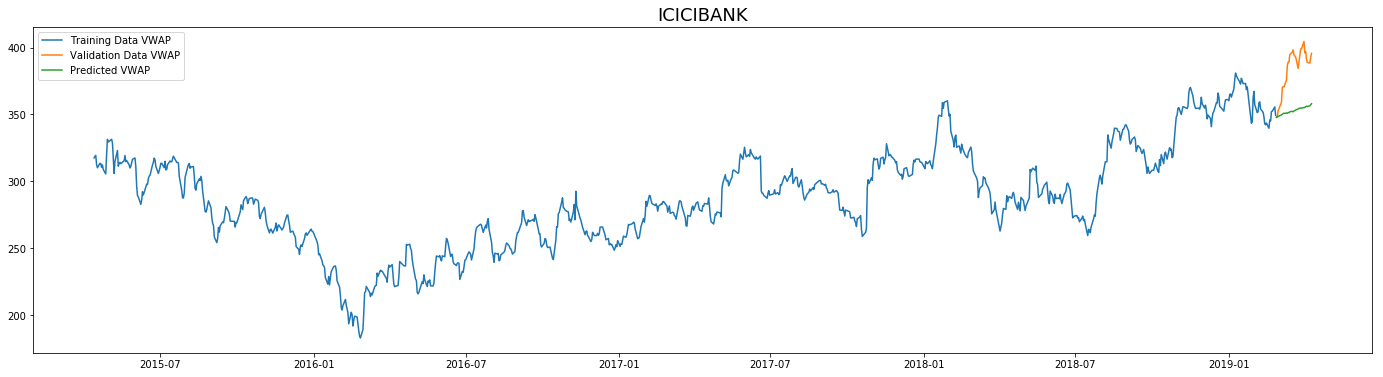

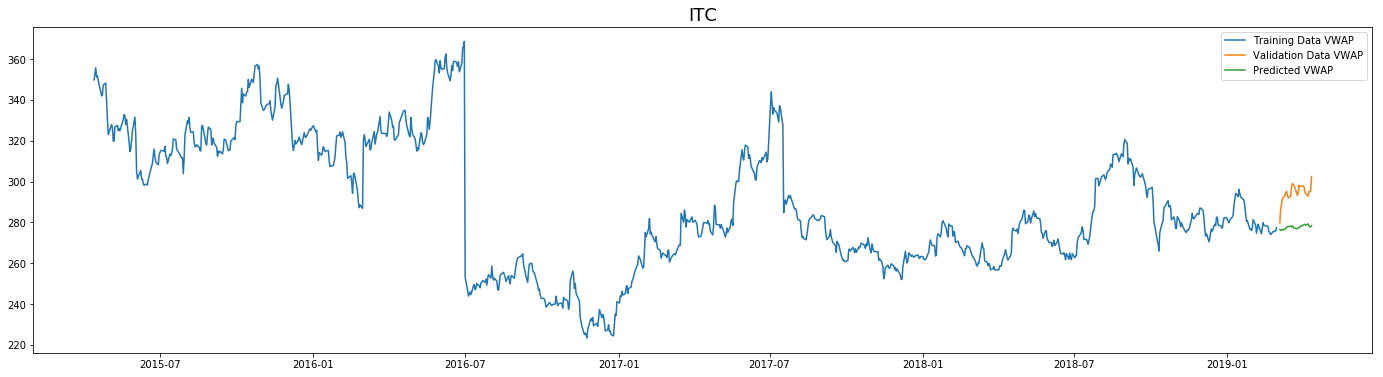

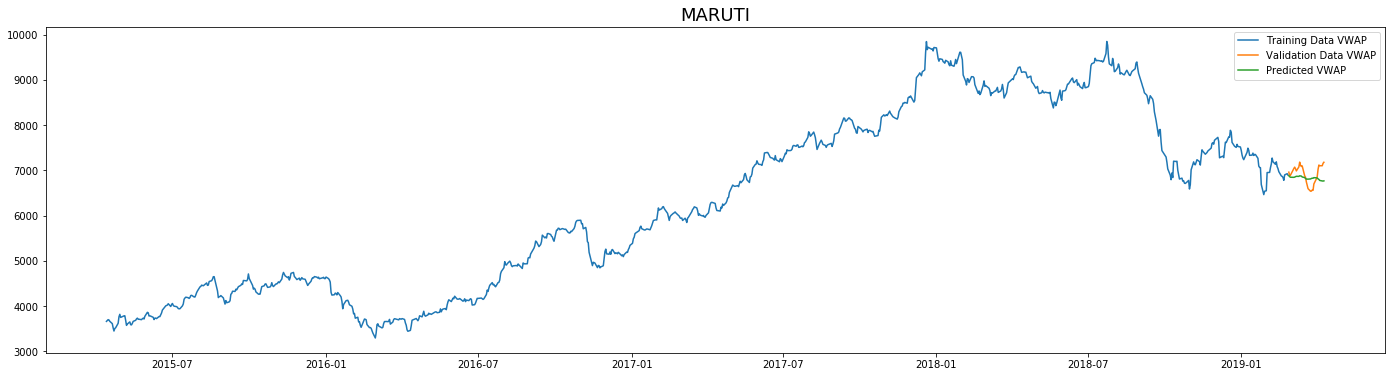

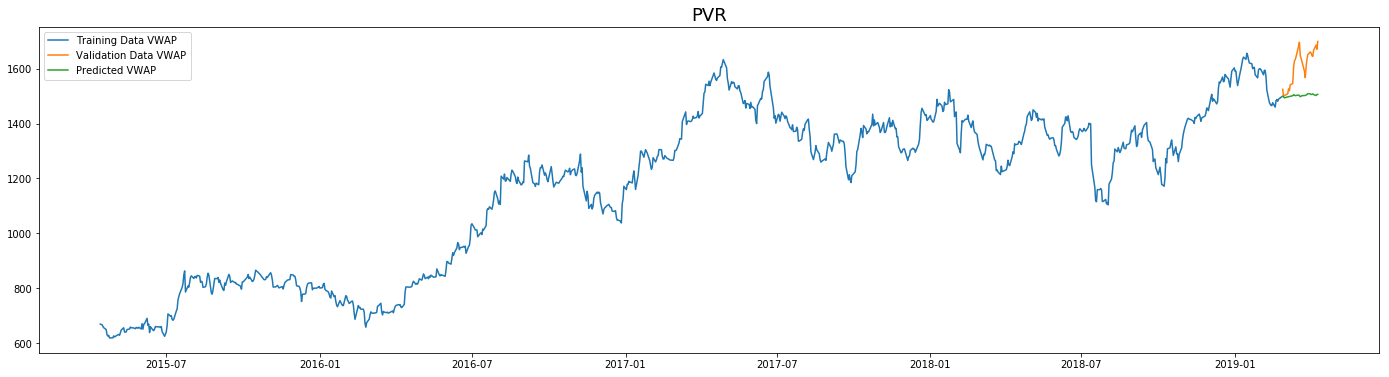

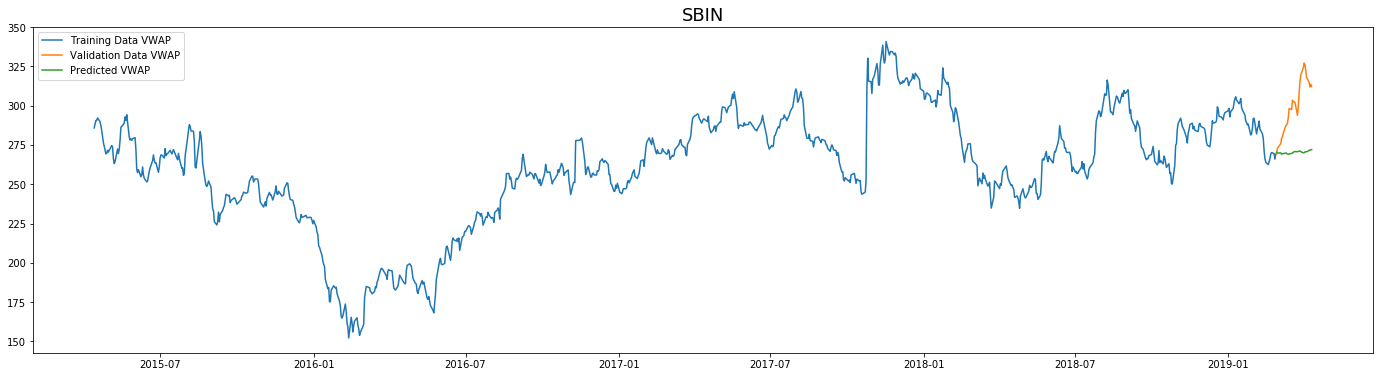

In [40]:
stockList = ['BIOCON', 'BRITANNIA', 'COALINDIA', 'EICHERMOT', 'HEIDELBERG', 'ICICIBANK', 'ITC','MARUTI', 'PVR', 'SBIN']

for stock in stockList:
    df = readCSV(stock)
    printSampleData(df)

    # Applying Arima Model
    print("Applying ARIMA Model on: {}".format(stock))
    arimaModel(df, stock)
    

{'BIOCON': 10.760898111763032, 'BRITANNIA': 104.02291331561547, 'COALINDIA': 20.917941232112238, 'EICHERMOT': 2110.138974384907, 'HEIDELBERG': 27.680386431353806, 'ICICIBANK': 34.54543039289545, 'ITC': 17.164461314961518, 'MARUTI': 226.5332417447723, 'PVR': 123.7182997418695, 'SBIN': 34.61767902339631}


Text(0.5, 1.0, 'Percentage RMS Error')

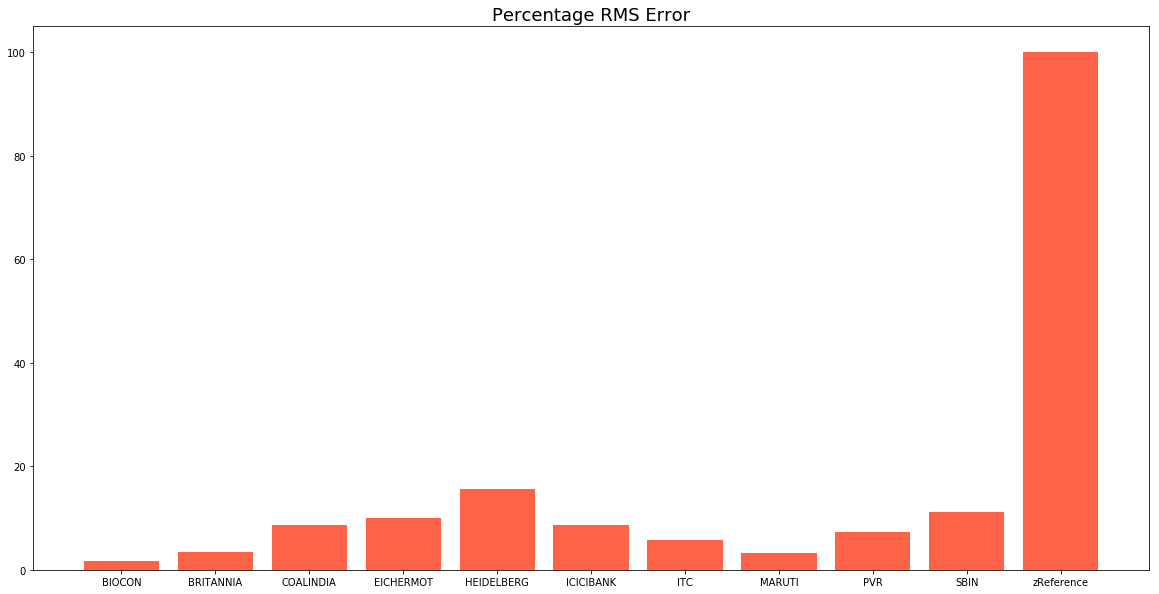

In [41]:
print(rmseStock)
for stock in rmseStock:
    if stock == 'BIOCON':
        rmseStock[stock] = (rmseStock[stock] / 627.68) * 100
    elif stock == 'BRITANNIA':
        rmseStock[stock] = (rmseStock[stock] / 2970.17) * 100
    elif stock == 'COALINDIA':
        rmseStock[stock] = (rmseStock[stock] / 240.90) * 100
    elif stock == 'EICHERMOT':
        rmseStock[stock] = (rmseStock[stock] / 21131.52) * 100
    elif stock == 'HEIDELBERG':
        rmseStock[stock] = (rmseStock[stock] / 177.81) * 100
    elif stock == 'ICICIBANK':
        rmseStock[stock] = (rmseStock[stock] / 395.63) * 100
    elif stock == 'ITC':
        rmseStock[stock] = (rmseStock[stock] / 302.46) * 100
    elif stock == 'MARUTI':
        rmseStock[stock] = (rmseStock[stock] / 7179.12) * 100
    elif stock == 'PVR':
        rmseStock[stock] = (rmseStock[stock] / 1699.61) * 100
    elif stock == 'SBIN':
        rmseStock[stock] = (rmseStock[stock] / 312.15) * 100
   
rmseStock['zReference'] = 100
    
plt.bar(list(rmseStock.keys()), rmseStock.values(), color='tomato')
plt.title("Percentage RMS Error", fontsize = 18)

## Inference:

#### Pros:
    - Trend identification
    - Performance better than LR
    - Error (RMS) lies in [2-10]%
    - Dividend doesn't affect the predcition and its clos enough to the actual value.
    
#### Cons: 
    - Scope for improvement.
    - Statistical model rather than Machine Learning model.
    - 